<a href="https://colab.research.google.com/github/juanxo90/basico_python/blob/main/Libreta6_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalamos librerias

In [1]:
%%capture
!pip install geopandas rtree pygeos

# Importamos las librerias a usar

In [2]:
import geopandas as gpd
import pandas as pd

# Obtenemos los datos

In [3]:
url = 'https://raw.githubusercontent.com/juanxo90/basico_python/main/data/geocrono.csv'

df = pd.read_csv(url)
df.head(3)

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,TIPO_EDAD,HEREDADOS,REFERENCIA,UNIDAD,LOC_TIPO,OBSERVA,PDF,CARTA50,CARTA250,TABLACRONO
0,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Edad de cristalización,NaN,"Helbig et al., 2012",Litodema Chazumba,NaN,NaN,NaN,PETLALCINGO E14-B84,ORIZABA E14-6,http://www.stratigraphy.org/ICSchart/Chronostr...
1,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Edad de cristalización,NaN,"Montoya-Lopera et al., 2020",Batolito Sinaloa,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,SAN JUAN F13-A16,MAZATLAN F13-1,http://www.stratigraphy.org/ICSchart/Chronostr...
2,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,-1,NaN,...,Edad de enfriamiento,NaN,"Solís-Pichardo (en Morán-Zenteno et al., 2000)",NaN,NaN,NaN,NaN,SANTA MARIA HUATULCO OAXACA D14-B19,PUERTO ESCONDIDO D14-3,http://www.stratigraphy.org/ICSchart/Chronostr...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6402 entries, 0 to 6401
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          0 non-null      float64
 1   description   0 non-null      float64
 2   timestamp     0 non-null      float64
 3   begin         0 non-null      float64
 4   end           0 non-null      float64
 5   altitudeMode  0 non-null      float64
 6   tessellate    6402 non-null   int64  
 7   extrude       6402 non-null   int64  
 8   visibility    6402 non-null   int64  
 9   drawOrder     0 non-null      float64
 10  icon          0 non-null      float64
 11  DES_CLAV      6401 non-null   object 
 12  RANGO_MA      6401 non-null   object 
 13  MUESTRA       6401 non-null   object 
 14  ESTADO        6117 non-null   object 
 15  LONG_         6402 non-null   float64
 16  LAT           6402 non-null   float64
 17  TIPO_ROCA     6267 non-null   object 
 18  ROCA          6331 non-null 

In [5]:
df_clean = (
    df.copy()
    .drop(
        columns = ['Name', 'description', 'timestamp',
                   'begin', 'end', 'altitudeMode', 
                   'drawOrder', 'icon', 'tessellate',
                   'extrude', 'visibility']
    )
)
df_clean.head(3)

,DES_CLAV,RANGO_MA,MUESTRA,ESTADO,LONG_,LAT,TIPO_ROCA,ROCA,METODO,MINERAL,...,TIPO_EDAD,HEREDADOS,REFERENCIA,UNIDAD,LOC_TIPO,OBSERVA,PDF,CARTA50,CARTA250,TABLACRONO
0,Pérmico-Cisuraliano,272.3 - 298.9,MH-73,Oaxaca,-97.699722,18.162778,Metamórfica,Esquisto micáceo (metapsamita),U-Pb,Circón,...,Edad de cristalización,NaN,"Helbig et al., 2012",Litodema Chazumba,NaN,NaN,NaN,PETLALCINGO E14-B84,ORIZABA E14-6,http://www.stratigraphy.org/ICSchart/Chronostr...
1,Paleógeno-Paleoceno,56 - 66,SD-107,Sinaloa,-106.269306,23.954953,Plutónica,Granodiorita,U-Pb,Zircón,...,Edad de cristalización,NaN,"Montoya-Lopera et al., 2020",Batolito Sinaloa,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,SAN JUAN F13-A16,MAZATLAN F13-1,http://www.stratigraphy.org/ICSchart/Chronostr...
2,Neógeno-Mioceno,5.333 - 23.03,H250,Oaxaca,-96.033340,15.933335,Plutónica,Tonalita,Rb-Sr,Biotita-Roca total,...,Edad de enfriamiento,NaN,"Solís-Pichardo (en Morán-Zenteno et al., 2000)",NaN,NaN,NaN,NaN,SANTA MARIA HUATULCO OAXACA D14-B19,PUERTO ESCONDIDO D14-3,http://www.stratigraphy.org/ICSchart/Chronostr...


In [6]:
gdf_crono = gpd.GeoDataFrame(df_clean,
                             geometry=gpd.points_from_xy(
                                 df_clean.LONG_,
                                 df_clean.LAT,
                             ))

In [22]:
mask = (gdf_crono.LONG_ > -70) & (gdf_crono.LAT < 10)
gdf_crono = gdf_crono[~mask]

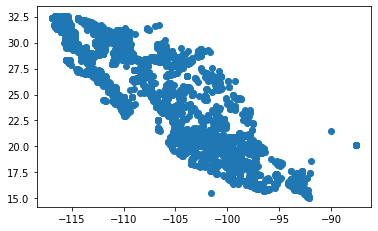

In [23]:
gdf_crono.plot()

In [31]:
gdf_crono.sort_values(by=['LONG_', 'LAT', 'MUESTRA'], ascending=False)

,DES_CLAV,RANGO_MA,MUESTRA,ESTADO,LONG_,LAT,TIPO_ROCA,ROCA,METODO,MINERAL,...,HEREDADOS,REFERENCIA,UNIDAD,LOC_TIPO,OBSERVA,PDF,CARTA50,CARTA250,TABLACRONO,geometry
2042,Cuaternario-Holoceno,Actual - 0.0117,H9,Quintana Roo,-87.569416,20.157783,NaN,NaN,C,Madera carbonizada,...,NaN,"Hering, F., et al., 2018",Cenote Chan Hol,NaN,Edad en años,NaN,TULUM F16-C88,COZUMEL F16-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-87.56942 20.15778)
1287,Cuaternario-Holoceno,Actual - 0.0117,H8,Quintana Roo,-87.569416,20.157783,NaN,NaN,C,Madera carbonizada,...,NaN,"Hering, F., et al., 2018",Cenote Chan Hol,NaN,Edad en años,NaN,TULUM F16-C88,COZUMEL F16-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-87.56942 20.15778)
1286,Cuaternario-Holoceno,Actual - 0.0117,H7,Quintana Roo,-87.569416,20.157783,NaN,NaN,C,Madera carbonizada,...,NaN,"Hering, F., et al., 2018",Cenote Chan Hol,NaN,Edad en años,NaN,TULUM F16-C88,COZUMEL F16-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-87.56942 20.15778)
1285,Cuaternario-Holoceno,Actual - 0.0117,H6,Quintana Roo,-87.569416,20.157783,NaN,NaN,C,Madera carbonizada,...,NaN,"Hering, F., et al., 2018",Cenote Chan Hol,NaN,Edad en años,NaN,TULUM F16-C88,COZUMEL F16-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-87.56942 20.15778)
2041,Cuaternario-Holoceno,Actual - 0.0117,H5,Quintana Roo,-87.569416,20.157783,NaN,NaN,C,Madera carbonizada,...,NaN,"Hering, F., et al., 2018",Cenote Chan Hol,NaN,Edad en años,NaN,TULUM F16-C88,COZUMEL F16-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-87.56942 20.15778)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Cretácico Superior-Santoniano,83.6 - 86.3,B2G-302,Baja California,-116.899905,32.366988,Plutónica,Gabro,K-Ar,Actinolita,...,NaN,"Krummenacher et al., 1975",Cinturón Batolítico Peninsular,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,LA PRESA I11-D71,TIJUANA I11-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-116.89991 32.36699)
3357,Cretácico Inferior-Aptiano,113 - 125,BIF-1,Baja California,-116.917128,32.404486,Plutónica,Granodiorita,K-Ar,Biotita,...,NaN,"Krummenacher et al., 1975",Cinturón Batolítico Peninsular,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,LA PRESA I11-D71,TIJUANA I11-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-116.91713 32.40449)
3908,Cretácico Inferior-Albiano,100.5 - 113,BIF-1,Baja California,-116.917128,32.404486,Plutónica,Granodiorita,K-Ar,Plagioclasa,...,NaN,"Krummenacher et al., 1975",Cinturón Batolítico Peninsular,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,LA PRESA I11-D71,TIJUANA I11-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-116.91713 32.40449)
3356,Cretácico Inferior-Albiano,100.5 - 113,845,Baja California,-116.917128,32.404486,Plutónica,Granodiorita,K-Ar,Plagioclasa,...,NaN,"Gastil et al., 1976",NaN,NaN,NaN,https://portal.sgm.gob.mx/GeoInfoMex_EdadesIso...,LA PRESA I11-D71,TIJUANA I11-11,http://www.stratigraphy.org/ICSchart/Chronostr...,POINT (-116.91713 32.40449)


In [35]:
mascara = (gdf_crono.LONG_ == -87.569416) & (gdf_crono.LAT == 20.157783)
gdf_crono[mascara].EDAD_MA.astype(int).mean()

7773.555555555556

In [46]:
gdf_crono[['EDAD_MA', 'REFERENCIA']][gdf_crono.EDAD_MA.str.contains('-', na=False)].head(15)

,EDAD_MA,REFERENCIA
37,102-116,"Baldwin y Harrison, 1989"
130,1120-1180,"Gehrels et al., 2002"
282,94-114,"Baldwin y Harrison, 1989"
464,111.8-117.4,"Jacques-Ayala et al., 2009"
470,1760-1780,"Premo et al., 2003"
600,"20-23, 23-25","Wong et al., 2010"
601,25-35,"Wong et al., 2010"
625,90.8-94.4,"Jacques-Ayala et al., 2009"
637,"20-23, 23-25","Wong y Gans, 2008"
644,"15-18, 18-22","Wong et al., 2010"


In [47]:
gdf_crono['EDAD_MA'][gdf_crono.EDAD_MA.str.contains('-', na=False)].str.extract('(\d+)').head(15)

,0
37,102
130,1120
282,94
464,111
470,1760
600,20
601,25
625,90
637,20
644,15


In [48]:
print(gdf_crono.crs)

None


In [50]:
gdf_crono.set_crs('epsg:4326', inplace=True)
print(gdf_crono.crs)

epsg:4326


In [52]:
url_edos = 'https://data.opendatasoft.com/explore/dataset/georef-mexico-state-millesime@public/download/?format=geojson&timezone=America/Mexico_City&lang=en'
estados = gpd.read_file(url_edos)
estados.head(10)

,sta_area_code,sta_name,sta_code,year,sta_type,geometry
0,MEX,Aguascalientes,01,2019,estado,"POLYGON ((-101.86167 22.02888, -101.86167 22.0..."
1,MEX,Oaxaca,20,2019,estado,"MULTIPOLYGON (((-96.22850 15.68753, -96.23115 ..."
2,MEX,Oaxaca,20,2018,estado,"MULTIPOLYGON (((-96.16188 15.72102, -96.16382 ..."
3,MEX,Baja California Sur,03,2019,estado,"MULTIPOLYGON (((-110.33877 24.28914, -110.3403..."
4,MEX,Morelos,17,2019,estado,"POLYGON ((-98.63295 19.01555, -98.64928 19.007..."
5,MEX,Tamaulipas,28,2018,estado,"POLYGON ((-98.67089 22.40567, -98.66904 22.405..."
6,MEX,Jalisco,14,2018,estado,"MULTIPOLYGON (((-104.81446 19.22904, -104.8167..."
7,MEX,Michoacán de Ocampo,16,2018,estado,"POLYGON ((-102.09625 20.38413, -102.09812 20.3..."
8,MEX,Nuevo León,19,2019,estado,"POLYGON ((-100.74232 24.46044, -100.71121 24.4..."
9,MEX,Quintana Roo,23,2019,estado,"MULTIPOLYGON (((-87.38975 18.37417, -87.38780 ..."


In [53]:
estados.sort_values(by='sta_code')

,sta_area_code,sta_name,sta_code,year,sta_type,geometry
0,MEX,Aguascalientes,01,2019,estado,"POLYGON ((-101.86167 22.02888, -101.86167 22.0..."
60,MEX,Aguascalientes,01,2018,estado,"POLYGON ((-101.86167 22.02888, -101.86053 22.0..."
42,MEX,Baja California,02,2018,estado,"MULTIPOLYGON (((-112.30067 28.38702, -112.3055..."
44,MEX,Baja California,02,2019,estado,"MULTIPOLYGON (((-112.30067 28.38702, -112.3055..."
3,MEX,Baja California Sur,03,2019,estado,"MULTIPOLYGON (((-110.33877 24.28914, -110.3403..."
...,...,...,...,...,...,...
62,MEX,Veracruz de Ignacio de la Llave,30,2019,estado,"MULTIPOLYGON (((-96.09229 19.17375, -96.09117 ..."
52,MEX,Yucatán,31,2019,estado,"MULTIPOLYGON (((-92.22410 20.90800, -92.22240 ..."
11,MEX,Yucatán,31,2018,estado,"MULTIPOLYGON (((-92.22410 20.90800, -92.22240 ..."
32,MEX,Zacatecas,32,2019,estado,"POLYGON ((-102.74530 21.72005, -102.75823 21.7..."


In [60]:
estados = estados[estados.year == '2019']

In [66]:
print(estados.crs)

epsg:4326


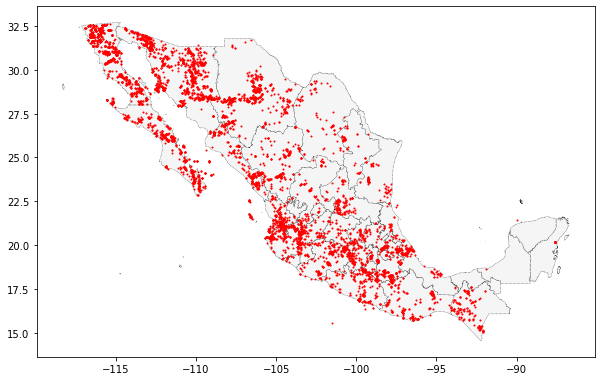

In [70]:
ax = estados.plot(figsize=(10,10),
                  color='whitesmoke',
                  linestyle=':',
                  edgecolor='black',
                  linewidth=0.5)
gdf_crono.plot(markersize=1, color='#FF0000', ax=ax)

In [114]:
test = gpd.sjoin(gdf_crono, estados[estados.sta_name == 'Chihuahua'], how='inner')#.plot()

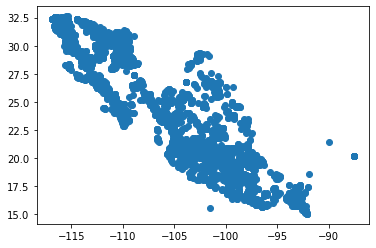

In [115]:
gdf_crono[~gdf_crono.index.isin(test.index)].plot()

In [109]:
quere = gpd.sjoin(gdf_crono, estados[estados.sta_name == 'Querétaro'], how='inner')
chuih = gpd.sjoin(gdf_crono, estados[estados.sta_name == 'Chihuahua'], how='inner')

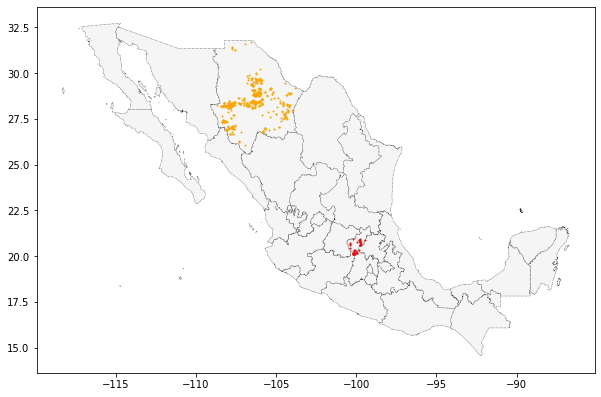

In [110]:
ax = estados.plot(figsize=(10,10),
                  color='whitesmoke',
                  linestyle=':',
                  edgecolor='black',
                  linewidth=0.5)
quere.plot(markersize=1, color='#FF0000', ax=ax)
chuih.plot(markersize=1, color='orange', ax=ax)

# Mapa interactivo

In [116]:
import folium
from folium import Marker

In [117]:
x_center = estados.centroid.x.mean()
y_center = estados.centroid.y.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [126]:
m = folium.Map(location=[y_center, x_center],
               tiles='cartodbpositron',
               zoom_start=5)

for i in range(0,5):
  Marker([chuih.LAT.iloc[i], chuih.LONG_.iloc[i]], 
         popup=chuih[['EDAD_MA', "ROCA"]].iloc[i].to_list()).add_to(m)

m